### Optimal control of oscillations and synchrony in the Wilson-Cowan model
This notebook shows how to compute the optimal control (OC) signal for the Wilson-Cowan model for an oscillation and a synchronization task.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx

while os.getcwd().split(os.sep)[-1] != "neurolib":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_wc

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
# We define plot functions for the control tasks

def plot_osc_singlenode(
    duration,
    dt,
    state,
    target_period,
    control,
    cost_array=(),
):
    """Plot target and controlled dynamics for a single node.
    :param duration:        Duration of simulation (in ms).
    :type duration:         float
    :param dt:              Time discretization (in ms).
    :type dt:               float
    :param state:           The state of the system controlled with the found oc-input.
    :type state:            np.ndarray
    :param target_period:   The target state.
    :type target_period:    np.ndarray
    :param control:         The control signal found by the oc-algorithm.
    :type control:          np.ndarray
    :param cost_array:      Array of costs in optimization iterations.
    :type cost_array:       np.ndarray, optional

    """
    fig, ax = plt.subplots(3, 1, figsize=(8, 6), constrained_layout=True)

    # Plot the target (dashed line) and unperturbed activity
    t_array = np.arange(0, duration + dt, dt)

    # Plot the controlled state and
    ax[0].plot(t_array, state[0, 0, :], label="E", color="red")
    ax[0].plot(t_array, state[0, 1, :], label="I", color="blue")

    for k in range(int(np.floor(duration/(2*target_period)))):
        ax[0].fill_between([2*k*target_period,(2*k+1)*target_period], y1=-0.05, y2=0.55, color="gray", alpha=0.5)

    ax[0].legend(loc="upper right")
    ax[0].set_ylabel("Activity")
    ax[0].set_xlim(0,duration)
    ax[0].set_xticks([])
    ax[0].set_ylim(-0.05, 0.55)

    # Plot the computed control signal and the initial/ original control signal (dashed line)
    ax[1].plot(t_array, control[0, 0, :], label="E", color="red")
    ax[1].plot(t_array, control[0, 1, :], label="I", color="blue")
    ax[1].legend(loc="upper right")
    ax[1].set_ylabel("Control")
    ax[1].set_xlim(0,duration)
    ax[1].set_xlabel("Time")

    ax[2].plot(cost_array)
    ax[2].set_xlim(0,len(cost_array))
    ax[2].set_ylabel("Cost throughout optimization")
    ax[2].set_ylabel("Iterations")

    plt.show()

def plot_osc_nw(
    duration,
    dt,
    state,
    control,
    N,
    cost_array=(),
):
    """Plot target and controlled dynamics for a single node.
    :param duration:        Duration of simulation (in ms).
    :type duration:         float
    :param dt:              Time discretization (in ms).
    :type dt:               float
    :param state:           The state of the system controlled with the found oc-input.
    :type state:            np.ndarray
    :param control:         The control signal found by the oc-algorithm.
    :type control:          np.ndarray
    :params N:              Number of nodes
    :type N:                int
    :param cost_array:      Array of costs in optimization iterations.
    :type cost_array:       np.ndarray, optional

    """
    fig, ax = plt.subplots(3, 1, figsize=(8, 6), constrained_layout=True)

    # Plot the target (dashed line) and unperturbed activity
    t_array = np.arange(0, duration + dt, dt)

    # Plot the controlled state and
    for n in range(N):
        ax[0].plot(t_array, state[n, 0, :])

    ax[0].set_ylabel("Exc activity")
    ax[0].set_xlim(0,duration)
    ax[0].set_xticks([])

    # Plot the computed control signal and the initial/ original control signal (dashed line)
    for n in range(N):
        ax[1].plot(t_array, control[n, 0, :])
    ax[1].set_ylabel("Exc control")
    ax[1].set_xlim(0,duration)
    ax[1].set_xlabel("Time")

    ax[2].plot(cost_array)
    ax[2].set_xlim(0,len(cost_array))
    ax[2].set_ylabel("Cost throughout optimization")
    ax[2].set_ylabel("Iterations")

    plt.show()

options = {
    'node_color': 'lightgray',
    'node_size': 1000,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 20,
    'font_size' : 20,
    'font_weight' : 'bold',
    }

def draw_nwgraph(cmat):
    G = nx.DiGraph() 
    for n in range(cmat.shape[0]):
            for l in range(cmat.shape[1]):
                if cmat[n,l] != 0:
                    G.add_edge(l,n)
    nx.draw(G, with_labels=True, arrows=True, **options)
    plt.show()

### Oscillation task: Fourier cost

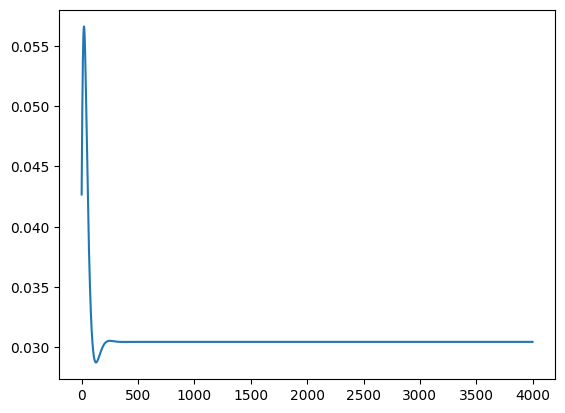

In [38]:
# We import the model
model = WCModel()

# Some parameters to define stimulation signals
dt = model.params["dt"]
model.params["exc_ext_baseline"] = 1. # go into up-state region
model.params["inh_ext_baseline"] = 1.

# We set the duration of the simulation and the initial values
duration = 400.
model.params["duration"] = duration
model.run()

plt.plot(model.exc[0,:])

model.params["exc_init"] = np.array([[model.exc[0,-1]]])
model.params["inh_init"] = np.array([[model.inh[0,-1]]])

# We define a "zero-input"
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -3.131243125570018e-35
Converged in iteration 2 with cost -0.019528353816430172
Final cost : -0.019528353816430172
Compute control for a deterministic system
Cost in iteration 0: -0.019528353816430172
Final cost : -0.027916157222340837
Compute control for a deterministic system
Cost in iteration 0: -0.005607208461740152
Cost in iteration 25: -0.017016110550057178
Cost in iteration 50: -0.017032825209084924
Cost in iteration 75: -0.017033846753196094
Cost in iteration 100: -0.01703417467882437
Final cost : -0.01703417467882437


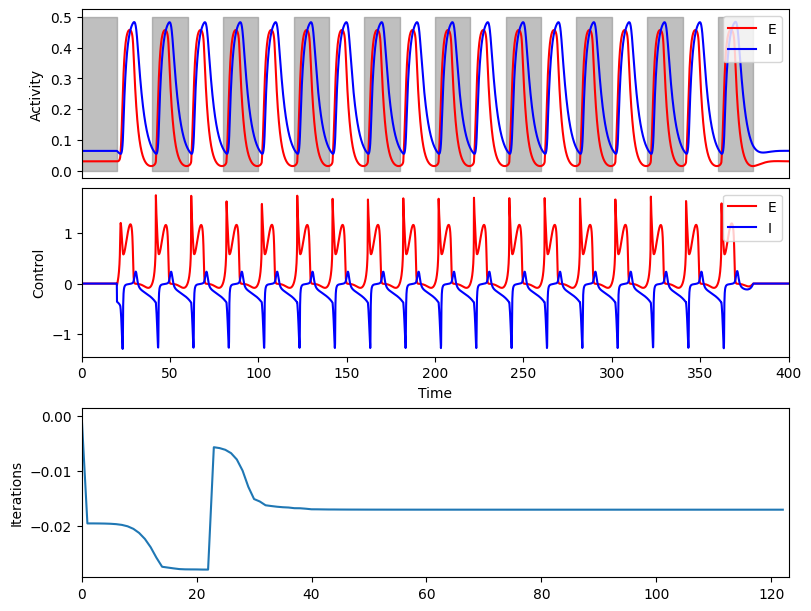

In [50]:
# We define the target period of the oscillation
target_period = 20.

# We set the external stimulation to zero. This is the "initial guess" for the OC algorithm
model.params["exc_ext"] = zero_input
model.params["inh_ext"] = zero_input

# We load the optimal control class
# print array (optional parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
model_controlled = oc_wc.OcWc(model, target_period, print_array=np.arange(0,101,10), control_interval=(200,-200), cost_interval=(200,-200))
model_controlled.weights["w_p"] = 0. # default value 1
model_controlled.weights["w_2"] = 1e-5 # default value 0, start with very small value and increase after having found a solution
model_controlled.weights["w_f"] = 1. # default value 0

model_controlled.step = 1e24 # initial step needs to be increased so the algorithm can find a solution
model_controlled.optimize(10)

model_controlled.zero_step_encountered = False
model_controlled.step = 10
model_controlled.optimize(20)

model_controlled.weights["w_2"] = 1e-4

model_controlled.zero_step_encountered = False
model_controlled.step = 10
model_controlled.optimize(100)

state = model_controlled.get_xs()
control = model_controlled.control

plot_osc_singlenode(duration, dt, state, target_period, control, cost_array=model_controlled.cost_history)

Compute control for a deterministic system
Cost in iteration 0: -0.01703417467882437
Cost in iteration 25: -0.017034381159508314
Cost in iteration 50: -0.017034530842961672
Cost in iteration 75: -0.017034645417376593
Cost in iteration 100: -0.017034733857130235
Final cost : -0.017034733857130235


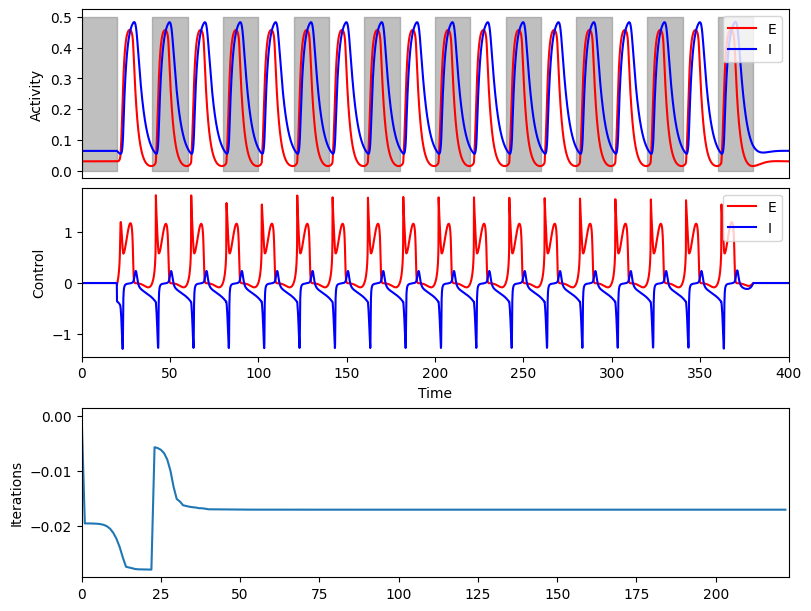

In [67]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.optimize(100)
state = model_controlled.get_xs()
control = model_controlled.control
plot_osc_singlenode(duration, dt, state, target_period, control, cost_array=model_controlled.cost_history)

### Synchronization task: Cross-correlation cost and variance cost

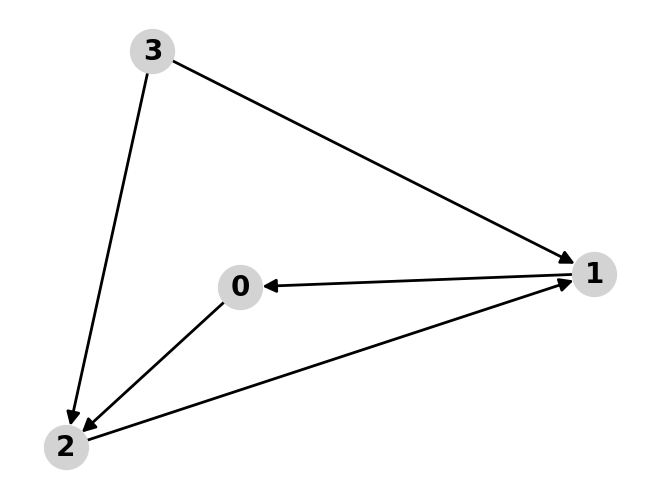

In [92]:
# generate random 4-node network
# different networks are differently easy or difficult to synchronize. Re-run the generation to study this effect, change parameters "p_connect" and "delay_factor"
N = 4

p_connect = 0.4 # probability that nodes are connected
delay_factor = 5.

p_inv = 1. - p_connect
cmat = np.random.choice([0, 1], size=(N,N), p=[p_inv, p_connect])
for n in range(N):
    cmat[n, n] = 0

dmat = np.random.random((N, N))
for n1 in range(N):
    for n2 in range(N):
        dmat[n1, n2] *= delay_factor * cmat[n1,n2]

draw_nwgraph(cmat)

In [93]:
model = WCModel(Cmat=cmat, Dmat=dmat)

# we define the control input matrix to enable or disable certain channels and nodes
control_mat = np.zeros( (model.params.N, len(model.state_vars)) )
control_mat[:,0] = 1. # only allow inputs in exc-channels
model.params["duration"] = duration

model.params["exc_ext_baseline"] = 2. # go into oscillatory region
model.params["inh_ext_baseline"] = 1.

# We set the duration of the simulation and the initial values
model.params["duration"] = duration
model.params.K_gl = 0.3     # default: 0.6, decrease slightly to make sync feasible
model.run()

# for reproducibility, fix initial conditions
model.params["exc_init"] = np.vstack([model.exc[0,-1], model.exc[1,-1], model.exc[2,-1], model.exc[3,-1]])
model.params["inh_init"] = np.vstack([model.inh[0,-1], model.inh[1,-1], model.inh[2,-1], model.inh[3,-1]])

# We set the stimulus in x and y variables, and run the simulation
zero_input_nw = np.concatenate( (np.vstack( [zero_input, zero_input] )[np.newaxis,:,:],
                                 np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]), axis=0)

model.run()

Start with cross-correlation cost functional

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 24.404889031200014
Cost in iteration 10: -41.540482155535955
Cost in iteration 20: -47.83420033574383
Cost in iteration 30: -48.04831085871368
Cost in iteration 40: -48.0539690872224
Cost in iteration 50: -48.05905041228931
Cost in iteration 60: -48.06423954712123
Cost in iteration 70: -48.06831659106699
Cost in iteration 80: -48.07318835188744
Cost in iteration 90: -48.07760412843677
Cost in iteration 100: -48.081766252826085
Final cost : -48.081766252826085


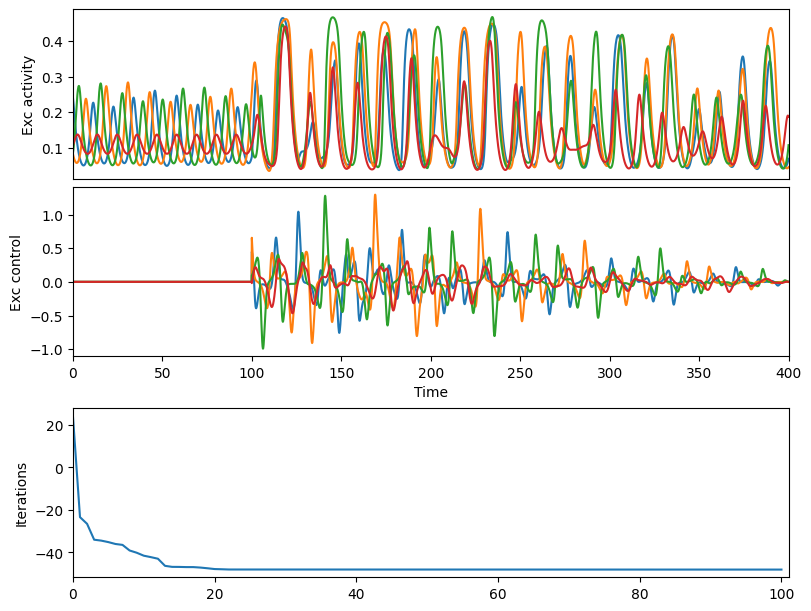

In [133]:
# we define the precision matrix to specify, in which nodes and channels we measure deviations from the target
cost_mat = np.zeros( (model.params.N, len(model.output_vars)) )
cost_mat[:,0] = 1. # only measure in x-channel in all nodes

# We set the external stimulation to zero. This is the "initial guess" for the OC algorithm
model.params["exc_ext"] = zero_input_nw[:,0,:]
model.params["inh_ext"] = zero_input_nw[:,0,:]

# We load the optimal control class
# print array (optional parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
model_controlled = oc_wc.OcWc(model, target_period, print_array=np.arange(0,101,10), control_matrix=control_mat, cost_matrix=cost_mat, control_interval=(1000, None), cost_interval=(1000, None))
model_controlled.weights["w_p"] = 0.
model_controlled.weights["w_2"] = 1.
model_controlled.weights["w_cc"] = 1.

# We run 500 iterations of the optimal control gradient descent algorithm
model_controlled.optimize(100)

state = model_controlled.get_xs()
control = model_controlled.control

plot_osc_nw(duration, dt, state, control, N, cost_array=model_controlled.cost_history)

Compute control for a deterministic system
Cost in iteration 0: -49.35726534738083
Converged in iteration 1 with cost -49.35726534738083
Final cost : -49.35726534738083


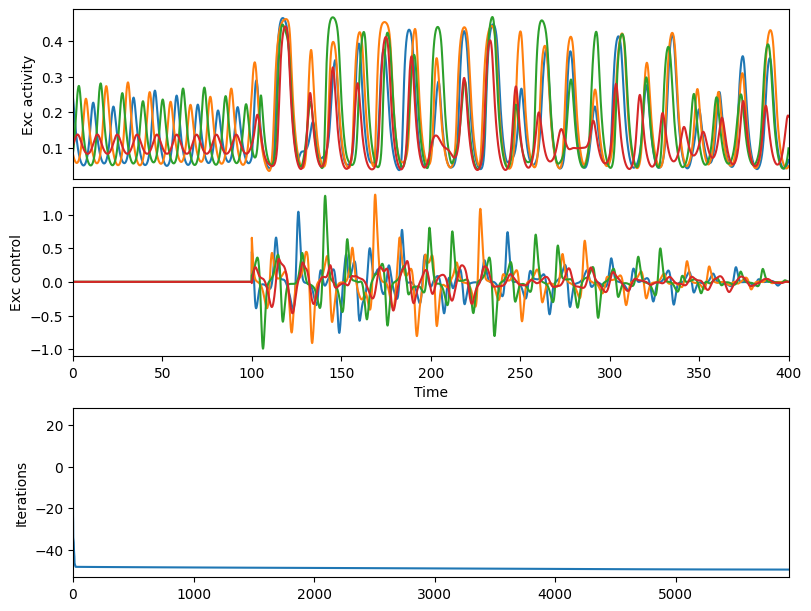

In [139]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.print_array=np.arange(0,101,10)
model_controlled.zero_step_encountered = False
model_controlled.grad_method = 0
model_controlled.channelwise_optimization = True
model_controlled.optimize(100)
state = model_controlled.get_xs()
control = model_controlled.control
plot_osc_nw(duration, dt, state, control, N, cost_array=model_controlled.cost_history)

Variance cost functional

Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: 0.995482632025529
Cost in iteration 25: 0.8469743810345641
Cost in iteration 50: 0.8202614071578912
Cost in iteration 75: 0.7982040522582614
Cost in iteration 100: 0.7794262247554126
Cost in iteration 125: 0.7619697865146787
Cost in iteration 150: 0.7468323045932891
Cost in iteration 175: 0.7376182666197675
Cost in iteration 200: 0.7274339290007052
Cost in iteration 225: 0.7182281497082147
Cost in iteration 250: 0.6848033924083796
Cost in iteration 275: 0.6558168305540161
Cost in iteration 300: 0.6436631968103109
Cost in iteration 325: 0.635503634015923
Cost in iteration 350: 0.6299644505203382
Cost in iteration 375: 0.6251130340241461
Cost in iteration 400: 0.6211360645278191
Cost in iteration 425: 0.6165876984005528
Cost in iteration 450: 0.6120713735795835
Cost in iteration 475: 0.6078821348387939
Cost in iteration 500: 0.6041148684090811
Final cost : 0.6041148684090811


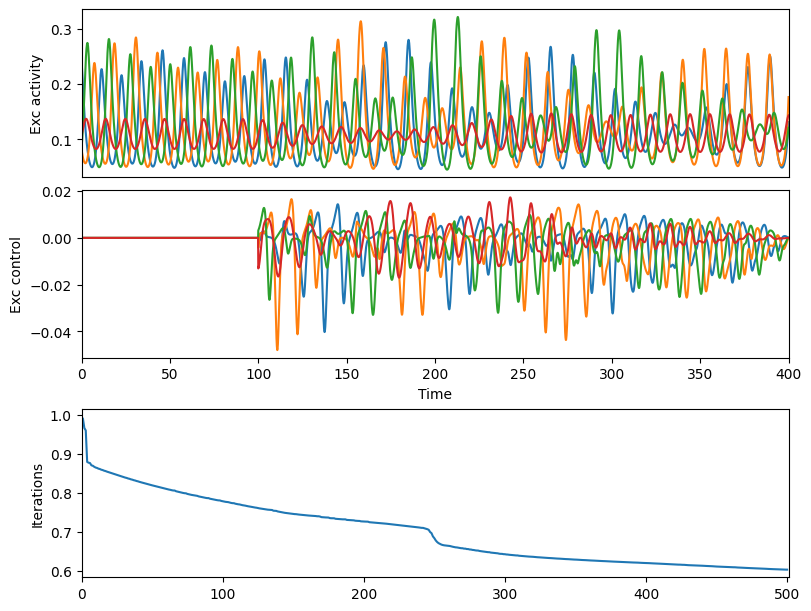

In [142]:
# We load the optimal control class
# print array (optional parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
model_controlled = oc_wc.OcWc(model, target_period, print_array=np.arange(0,501,25), control_matrix=control_mat, cost_matrix=cost_mat, control_interval=(1000, None), cost_interval=(1000, None))
model_controlled.weights["w_p"] = 0.
model_controlled.weights["w_2"] = 1.
model_controlled.weights["w_var"] = 1.

# We run 500 iterations of the optimal control gradient descent algorithm
model_controlled.optimize(500)

state = model_controlled.get_xs()
control = model_controlled.control

plot_osc_nw(duration, dt, state, control, N, cost_array=model_controlled.cost_history)

Compute control for a deterministic system
Cost in iteration 0: 0.5119570724900404
Cost in iteration 500: 0.5107972779800246
Cost in iteration 1000: 0.5097374588707593
Final cost : 0.5097374588707593


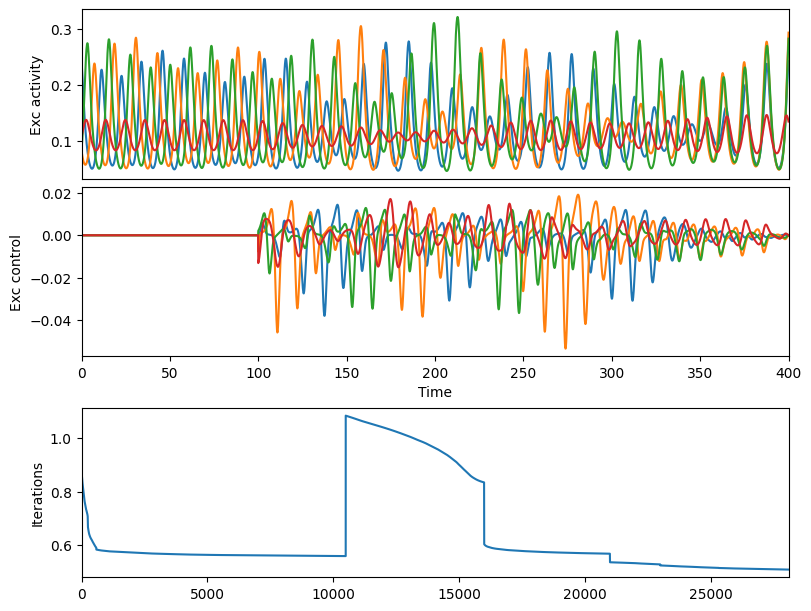

In [155]:
# Do another 500 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.print_array=np.arange(0,5001,500)
model_controlled.channelwise_optimization = True
model_controlled.weights["w_2"] = 1e-8
model_controlled.grad_method =1

model_controlled.optimize(1000)
state = model_controlled.get_xs()
control = model_controlled.control
plot_osc_nw(duration, dt, state, control, N, cost_array=model_controlled.cost_history)

In [140]:
control_var = model_controlled.control.copy()